In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [5]:
features = df.copy()
features.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Dropping Columns with Low Cardinality

features.drop(columns = ["fueltype", "aspiration", "doornumber", "drivewheel", 
                         "enginelocation", "symboling", "carbody"], inplace = True)

features.columns

Index(['car_ID', 'CarName', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [7]:
# Dropping Columns with High Cardinality

features.drop(columns = ["car_ID", "CarName", "curbweight"], inplace = True)

features.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
features.select_dtypes("object").head()

,enginetype,cylindernumber,fuelsystem
0,dohc,four,mpfi
1,dohc,four,mpfi
2,ohcv,six,mpfi
3,ohc,four,mpfi
4,ohc,five,mpfi


<AxesSubplot:>

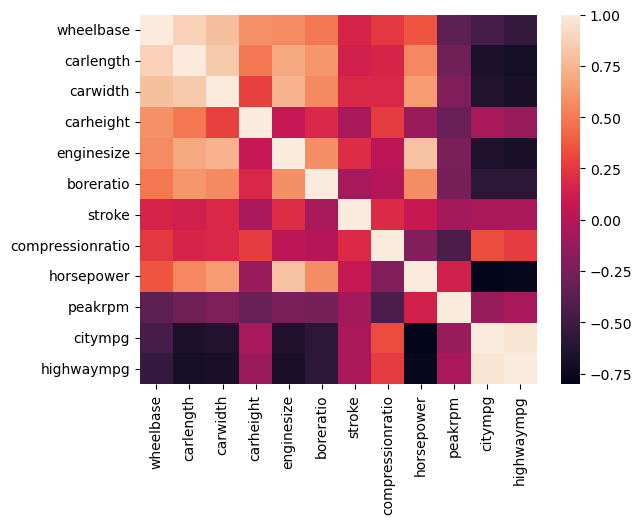

In [9]:
# Finding features with high-corelation to each other

import seaborn as sns

corr = features.select_dtypes("number").drop(columns = ["price"]).corr()
sns.heatmap(corr)

In [10]:
# features.info()
# features.head()

# std = features["highwaympg"].std()
# print(std)

In [11]:
# Dropping Features with High Co-Relation to each other

features.drop(columns = ["wheelbase", "carlength", "enginesize", 
                        "boreratio", "highwaympg"], inplace = True)

features.columns

Index(['carwidth', 'carheight', 'enginetype', 'cylindernumber', 'fuelsystem',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'price'],
      dtype='object')

<AxesSubplot:>

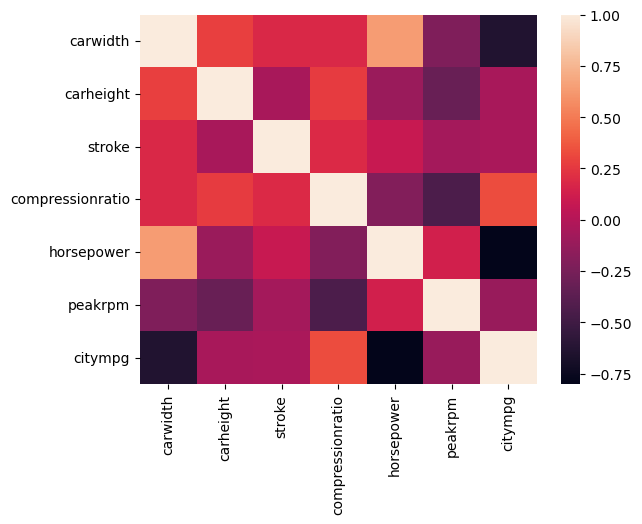

In [12]:
corr = features.select_dtypes("number").drop(columns = ["price"]).corr()
sns.heatmap(corr)

In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carwidth          205 non-null    float64
 1   carheight         205 non-null    float64
 2   enginetype        205 non-null    object 
 3   cylindernumber    205 non-null    object 
 4   fuelsystem        205 non-null    object 
 5   stroke            205 non-null    float64
 6   compressionratio  205 non-null    float64
 7   horsepower        205 non-null    int64  
 8   peakrpm           205 non-null    int64  
 9   citympg           205 non-null    int64  
 10  price             205 non-null    float64
dtypes: float64(5), int64(3), object(3)
memory usage: 17.7+ KB


In [14]:
target = features["price"]
target.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [15]:
features.drop(columns = ["price"], inplace = True)

In [16]:
features.head()

,carwidth,carheight,enginetype,cylindernumber,fuelsystem,stroke,compressionratio,horsepower,peakrpm,citympg
0,64.1,48.8,dohc,four,mpfi,2.68,9.0,111,5000,21
1,64.1,48.8,dohc,four,mpfi,2.68,9.0,111,5000,21
2,65.5,52.4,ohcv,six,mpfi,3.47,9.0,154,5000,19
3,66.2,54.3,ohc,four,mpfi,3.40,10.0,102,5500,24
4,66.4,54.3,ohc,five,mpfi,3.40,8.0,115,5500,18


In [17]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Ridge

model = LinearRegression()

In [22]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [23]:
features['enginetype']= label_encoder.fit_transform(features['enginetype'])
features['cylindernumber']= label_encoder.fit_transform(features['cylindernumber'])
features['fuelsystem']= label_encoder.fit_transform(features['fuelsystem'])

In [24]:
features.head()

,carwidth,carheight,enginetype,cylindernumber,fuelsystem,stroke,compressionratio,horsepower,peakrpm,citympg
0,64.1,48.8,0,2,5,2.68,9.0,111,5000,21
1,64.1,48.8,0,2,5,2.68,9.0,111,5000,21
2,65.5,52.4,5,3,5,3.47,9.0,154,5000,19
3,66.2,54.3,3,2,5,3.40,10.0,102,5500,24
4,66.4,54.3,3,1,5,3.40,8.0,115,5500,18


In [25]:
model.fit(features, target)

Pipeline(steps=[('onehotencoder', OneHotEncoder()), ('ridge', Ridge())])

In [26]:
predictions = model.predict(features)
predictions = pd.Series(predictions)
predictions.head()

0    14836.307340
1    14836.307340
2    17234.595206
3    13237.651972
4    18428.242692
dtype: float64

In [27]:
target.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [28]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean Absolute Error:", mae(target, predictions))

Mean Absolute Error: 797.8679888933815
